In [207]:
import pandas as pd

In [208]:
import matplotlib.pyplot as plt 

## Loading manually labelled data

In [210]:
data = pd.read_csv('label_data.csv')

In [211]:
# storing length of columns ignoring column 'label'
col_len = data.shape[1]-1

# creating a new column list for the csv as there are no column names from MatLab
cols = [str(each+1)+'A' for each in range(int(col_len/2))] + [str(each+1)+'V' for each in range(int(col_len/2))]

# assigning new column names to the dataframe
data.columns = cols + ['label']

## Ploatting the data 

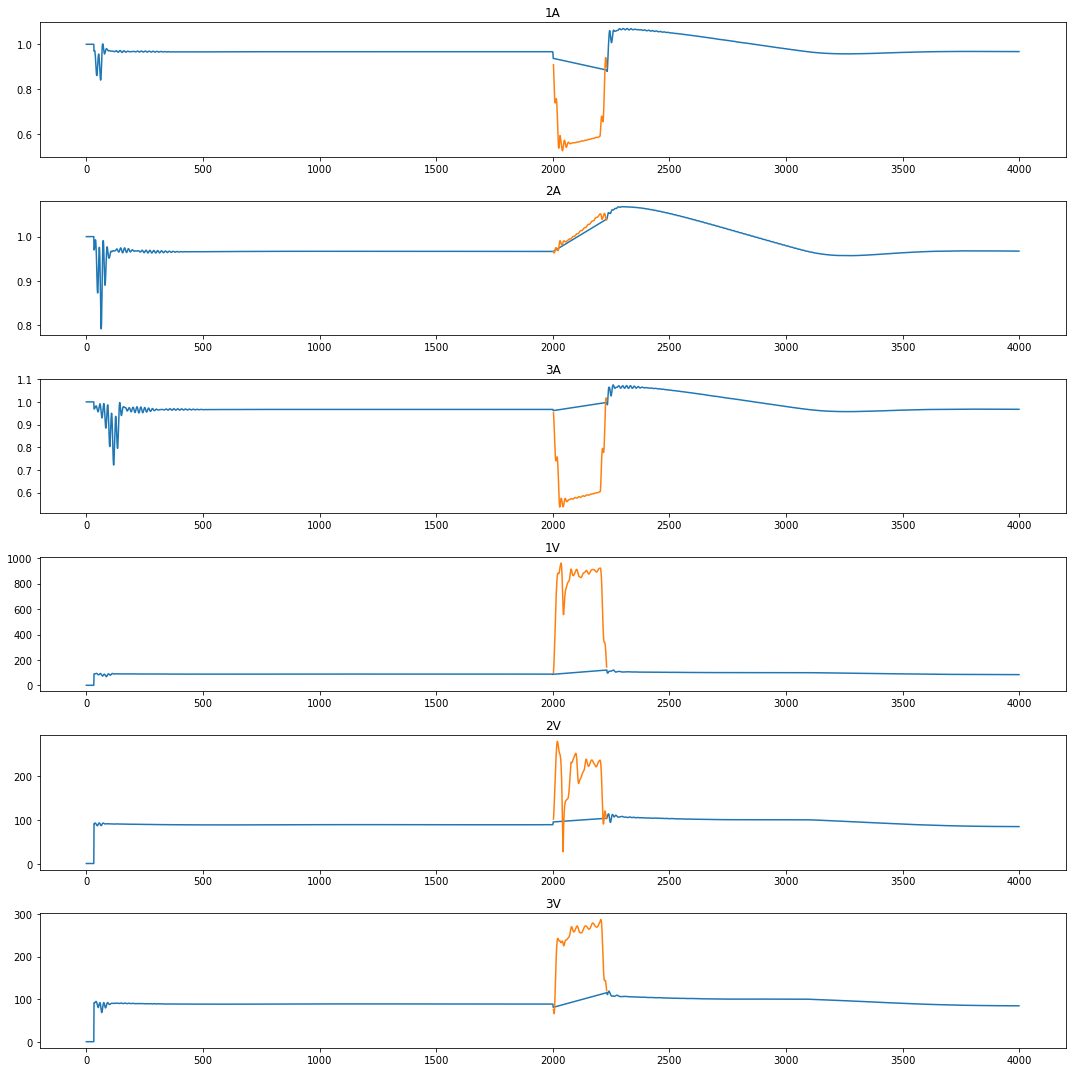

In [212]:
fig, ax = plt.subplots(6,figsize=(15,15))

normal = data[data.label == 'NML']
abnormal = data[data.label == 'AG']
for i in range(col_len):

    ax[i].plot(normal[cols[i]],"-")
    ax[i].plot(abnormal[cols[i]],"-")
    ax[i].set_title(cols[i])
fig.tight_layout()


## Creating SVM (support vector machine)

In [213]:
from sklearn import svm

In [303]:
dataset = pd.read_csv('./TrainingSet/dataset_simulink.csv')
dataset.dropna(inplace = True)

In [304]:
from sklearn.utils import shuffle
dataset = shuffle(dataset)
dataset = dataset.reset_index(drop=True)

In [305]:
# storing length of columns ignoring column 'label'
data = dataset
col_len = data.shape[1]-1

# creating a new column list for the csv as there are no column names from MatLab
cols = [str(each+1)+'A' for each in range(int(col_len/2))] + [str(each+1)+'V' for each in range(int(col_len/2))]

# assigning new column names to the dataframe
data.columns = cols + ['label']

dataset = data

In [306]:
# creating training set ignoring labels
train_data = dataset[cols]
labels = dataset['label']

# converting it to list of list from DataFrame
#train_data = train_data.values.tolist()

In [307]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =   train_test_split(train_data,  labels, test_size=0.20,shuffle = False)

In [309]:
# configuring and fitting the model
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train )

SVC(decision_function_shape='ovo')

In [310]:
clf.score(X_test, y_test)

0.9640340909090909

In [361]:
# reading the new dataset from csv
# new dataset with changed simulation length and occurance time
new_data = pd.read_csv('ml_test.csv')
testing  = new_data.values.tolist()

In [362]:
# predicting the labels for new dataset
gend_labels = clf.predict(testing)

# adding predicted labels to new dataframe
new_data['label'] = gend_labels

In [363]:
# changing column names because MatLab does not assign the column names
new_data.columns = cols + ['label']

In [364]:
df = new_data
#new_data['labels'] = gen
unq_labels = list(set(gend_labels))


df['label'] = df['label'].apply(unq_labels.index)
df.head()



,1A,2A,3A,1V,2V,3V,label
0,1.0,1.0,1.0,1.0,1.0,1.0,0
1,1.0,1.0,1.0,1.0,1.0,1.0,0
2,1.0,1.0,1.0,1.0,1.0,1.0,0
3,1.0,1.0,1.0,1.0,1.0,1.0,0
4,1.0,1.0,1.0,1.0,1.0,1.0,0


In [395]:
unq_labels

['NML', 'CG', 'BC']

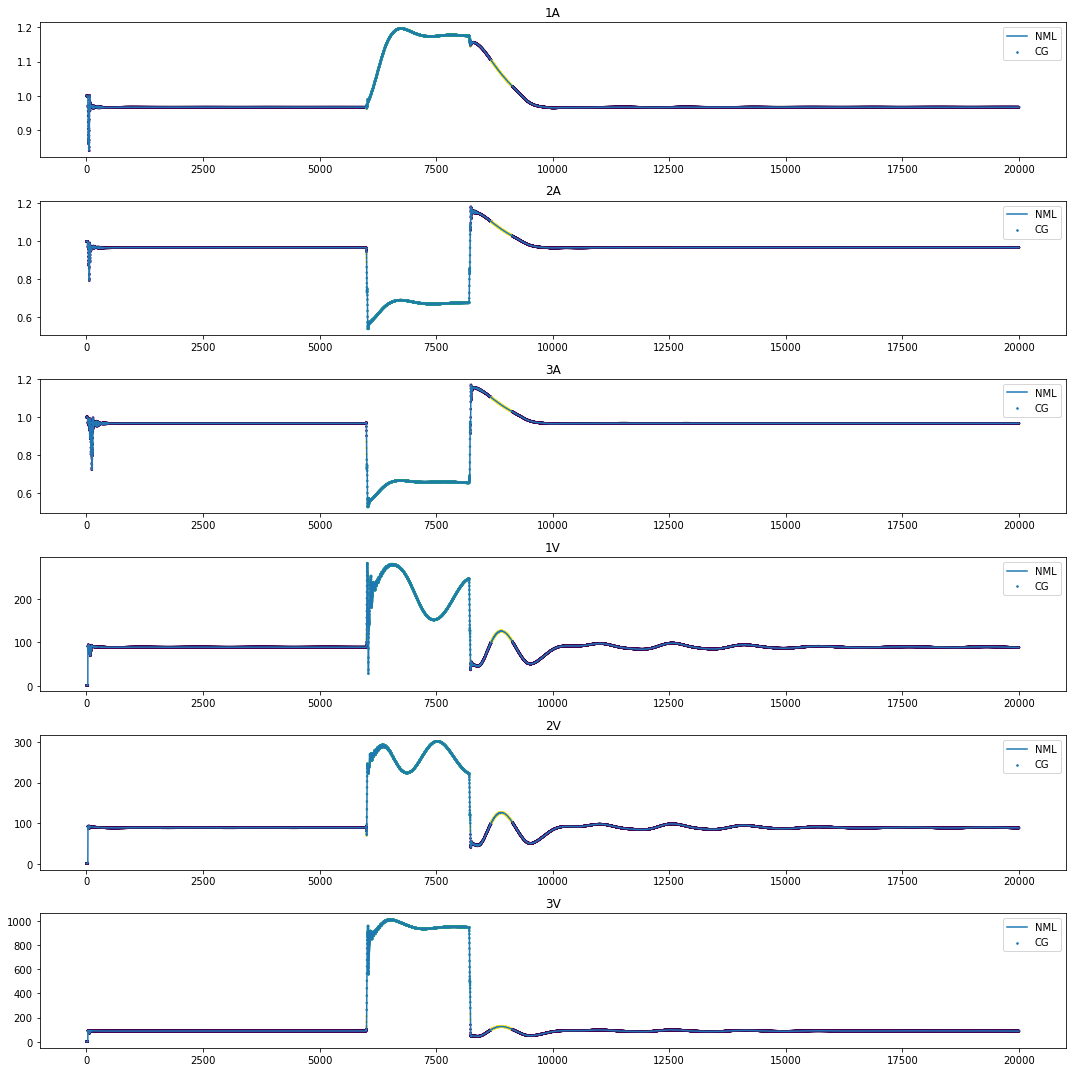

In [396]:
fig, ax = plt.subplots(6,figsize=(15,15))

for i in range(col_len):
    
    ax[i].scatter(df.index,df[cols[i]],marker='.',c=new_data['label'].values.tolist(),s=10)
    ax[i].plot(df[cols[i]])
    
    ax[i].set_title(cols[i])
    
    ax[i].legend(labels=unq_labels)
fig.tight_layout()


## Plotting predicted data

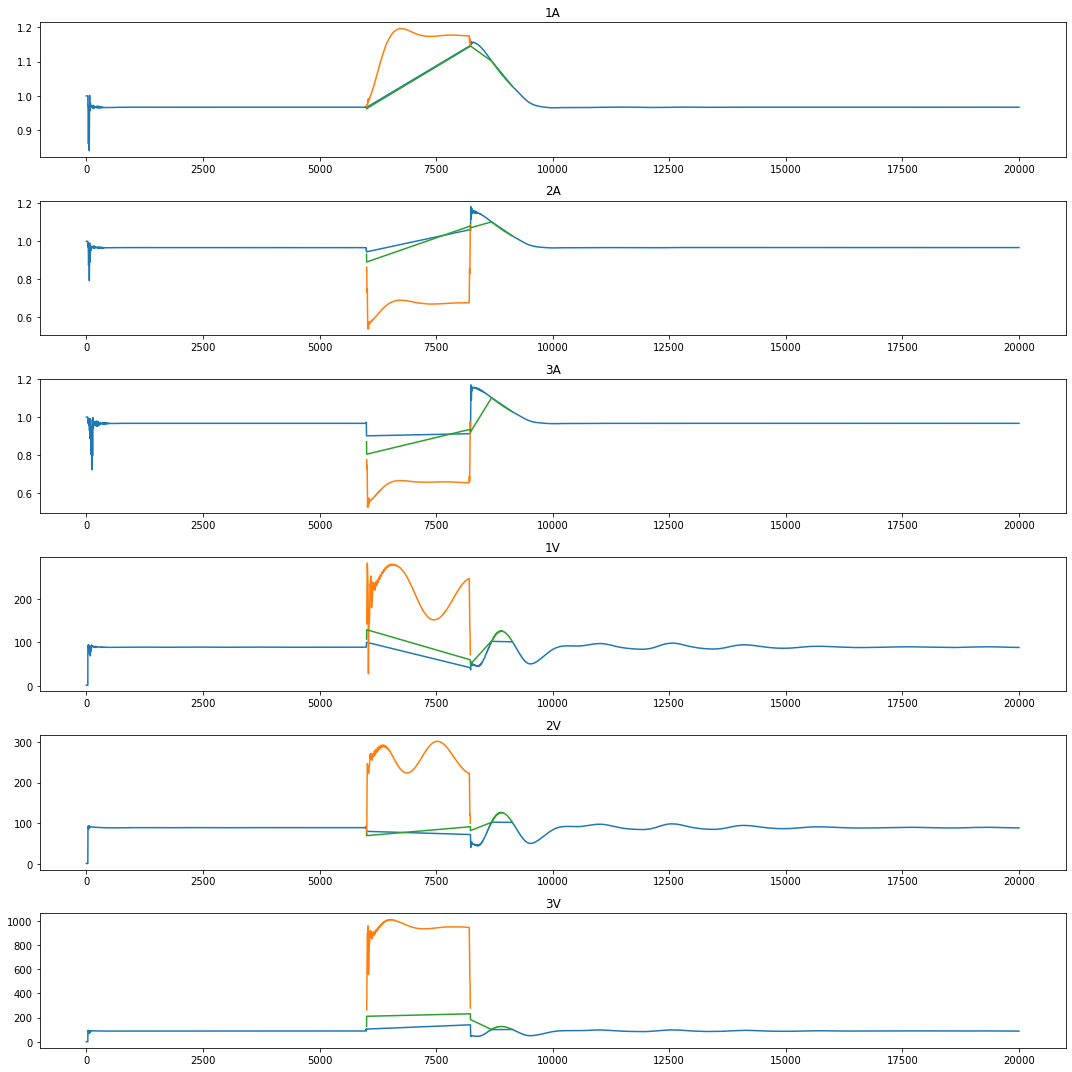

In [325]:
fig, ax = plt.subplots(6,figsize=(15,15))

unq_labels = list(set(gend_labels))


temp = []

for each in unq_labels:
    
    temp.append(new_data[new_data.label == each])


for i in range(col_len):
    
    for j in temp:

        ax[i].plot(j[cols[i]],"-")
        
    ax[i].set_title(cols[i])
fig.tight_layout()

## Simulation results of ampere

<img src="amp_simulation.png">

## Simulation results of voltage

<img src="voltage_simulation.png">